# Data Preparation for our Bilouvain Algorithm

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import bilouvain_module as bl
%matplotlib inline

For our algorithm to run, the nodes in the Graph need to have the attribute node_type, which for one group of nodes (here users) has the value "top" and for the other group (here movies) the value "bottom". 

In [15]:
# Import file
file_path = './Data/augm_movies400.csv'
# final visulization with these two files: 'augm_movies400.csv', 'moviesR_usersA.csv'
lboxd = pd.read_csv(file_path)
lboxd.drop(['movie_id', 'rating', 'date', 'minute', 'mean_rating', 'genre', 'country'], axis=1, inplace=True)

# create graph
G = nx.Graph()
G.add_nodes_from(lboxd['user'].unique(), bipartite=0)
G.add_nodes_from(lboxd['title'].unique(), bipartite=1)
G.add_edges_from(lboxd[['user', 'title']].values)

# node types
users = {n for n, d in G.nodes(data=True) if d['bipartite'] == 0}
movies = {n for n, d in G.nodes(data=True) if d['bipartite'] == 1}
node_types = {node:'top' if node in users else 'bottom' for node in G.nodes}
nx.set_node_attributes(G, node_types, name="node_type")

# converting them to numbers for plotting
num_types = {node: 0 if node in users else 1 for node in G.nodes}

In [16]:
# find communities with our algorithm
communities = bl.bilouvain(G)

iteration: 1


# Visualization of our network

In [ ]:
# prepare colors according to node type
type_colors = ['tab:red', 'tab:blue']
t_colors = [type_colors[num_types[node_id]] for node_id in G.nodes()]
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', label='Users', markersize=10, markerfacecolor='tab:red'),
                  plt.Line2D([0], [0], marker='o', color='w', label='Movies', markersize=10, markerfacecolor='tab:blue')]


# prepare colors according to communities
node_id_to_community = {node_id: i for i, community in enumerate(communities.values()) for node_id in community}

comm_colors = [
    "red", "blue", "green", "yellow", "orange", "purple", "pink", "brown", 
    "black", "white", "gray", "cyan", "magenta", "lime", "indigo", "violet", 
    "gold", "silver", "beige", "teal"
]
colors = [comm_colors[node_id_to_community[node_id]] for node_id in G.nodes()]

Text(0.5, 1.0, 'Sample 500 Random Movies - Node Types')

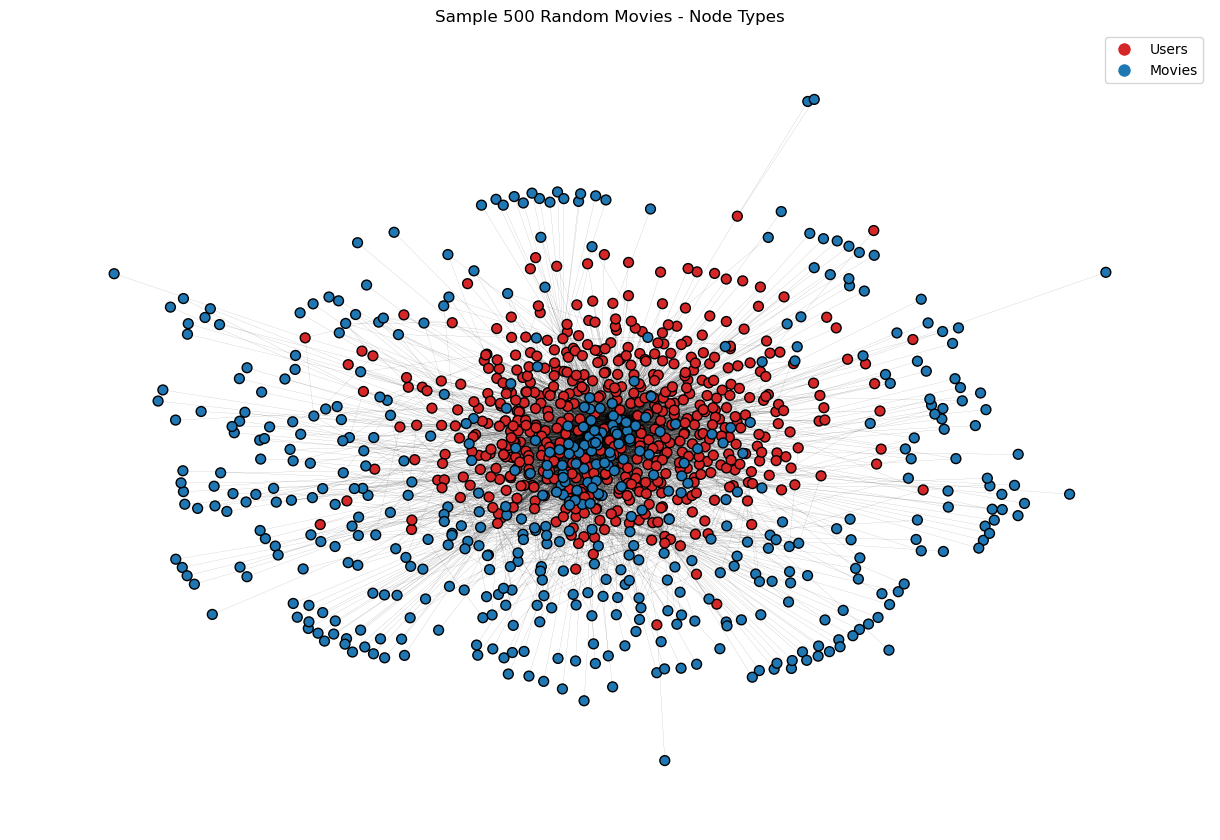

In [ ]:
# draw network with node types as colors
pos = nx.spring_layout(G)
fig = plt.figure(figsize=(12, 8))
nx.draw(G, pos, node_size=50, width=0.05, node_color=t_colors, edgecolors='k', font_color='w', font_size=10, edge_color='black')
plt.legend(handles=legend_patches, loc='upper right')
plt.title("Sample 500 Random Movies - Node Types")

Text(0.5, 1.0, 'Sample 500 Random Movies - Communities')

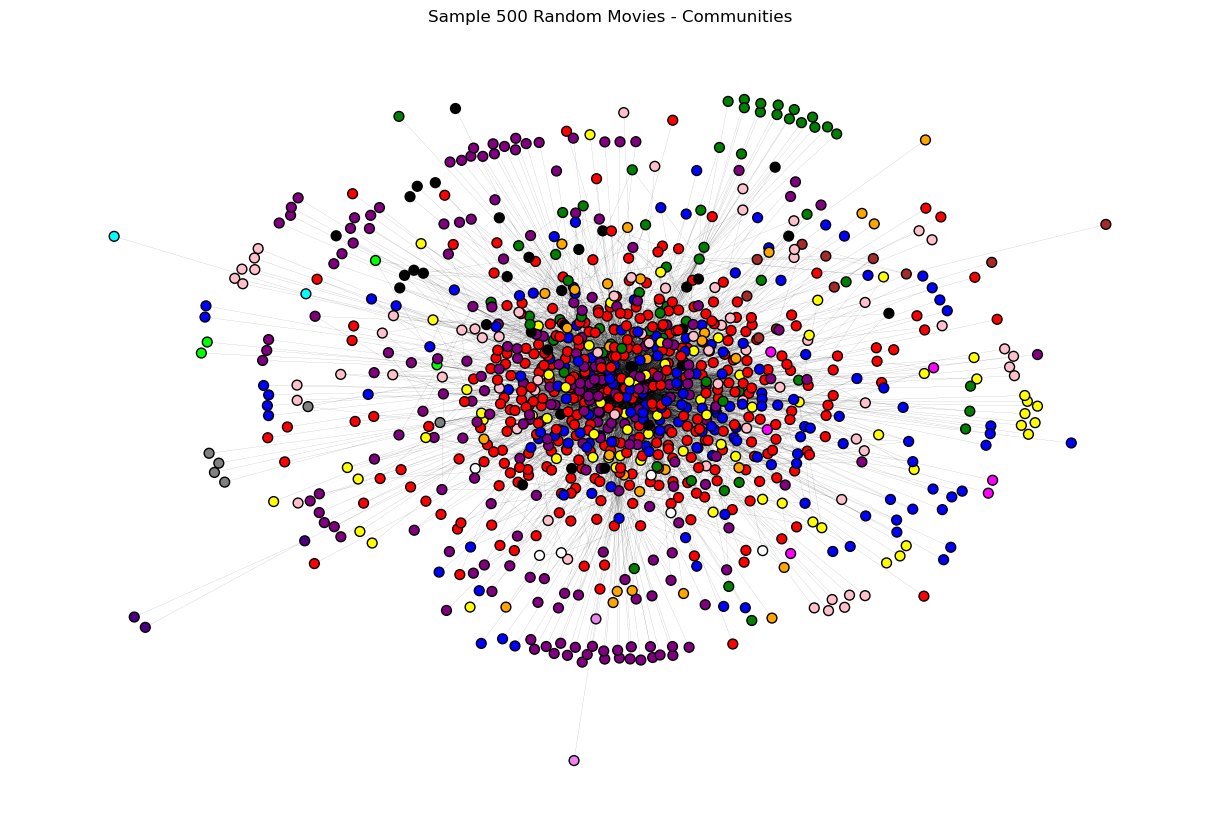

In [ ]:
# draw networks with communities as colors
pos = nx.spring_layout(G)
fig = plt.figure(figsize=(12, 8))
nx.draw(G, pos, node_size=50, width=0.05, node_color=colors, edgecolors='k', font_color='w', font_size=10, edge_color='black')
plt.title("Sample 500 Random Movies - Communities")